<a href="https://colab.research.google.com/github/IndigoJones02/Uprooted/blob/main/gentriffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path1 = "/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"     
d1 = pd.read_csv(path1, engine='python',encoding='latin1')  

d1 = pd.DataFrame({'Regionid':d1['RegionID'],
                  'SizeRank': d1['SizeRank'],
                  'Zip':d1['RegionName'],
                  'State': d1['State'],
                  'City': d1['City'],
                  'Metro': d1['Metro'],
                  'CountyName': d1['CountyName'],
                  '2017-12-31': d1['2017-12-31'],
                  '2018-12-31': d1['2018-12-31'],
                  '2019-12-31': d1['2019-12-31'],
                  '2020-12-31': d1['2020-12-31'],
                  '2021-12-31': d1['2021-12-31'],})

for d in range(len(d1)):
    if d1['State'][d] != 'TN':
        d1 = d1.drop([d])
for e in d1.index:
    if d1['City'][e] != 'Nashville':
        d1 = d1.drop([e])
        
avg_pv = []
for h in d1.index:
    avg_pv.append((d1['2017-12-31'][h]+d1['2018-12-31'][h]+d1['2019-12-31'][h]+d1['2020-12-31'][h]+d1['2021-12-31'][h])/5)

def standard_dev(arr, mean):
    d = 0
    for n in arr:
        d += (n - mean)**2
    return (d / len(arr)) ** 0.5


def standardized_norm(arr, mean, std):
    nums_std = []
    for n in arr:
        nums_std.append((n - mean)/std )
    return nums_std    

pv = []
for l in avg_pv:
    pv.append(l)
pv_mean = np.mean(pv)

pv_arr = standardized_norm(pv, pv_mean, standard_dev(pv, pv_mean) )

zips = []
for e in d1.index:
  zips.append(str(d1['Zip'][e]))

d1 = pd.DataFrame({
                  'Zip': zips,
                  'Property Value': pv_arr})
d1 = d1.convert_dtypes()

print(len(d1))


21


In [ ]:
path2 = "/GenStats-Nashville - Income Nash.csv"     
d2 = pd.read_csv(path2, engine='python',encoding='latin1')  

# need to convert census tract to str
ct = []
for a in d2['Census Tract']:
    ct.append(str(a))
    
d2 = d2.convert_dtypes()   

mi = []
for b in d2['Median Income']:
    mi.append(b)
mhinc_mean = np.mean(mi)

minc = standardized_norm(mi, mhinc_mean, standard_dev(mi, mhinc_mean) )

d2 = pd.DataFrame({'Census Tract ID': ct, 'Median Income': minc})
d2
# print(d2.dtypes)

,Census Tract ID,Median Income
0,47037010103,-0.173599
1,47037010104,0.792920
2,47037010105,-0.131598
3,47037010106,-0.072167
4,47037010201,-0.097434
...,...,...
163,47037019402,0.552796
164,47037019501,-0.298987
165,47037019502,-0.120944
166,47037019503,0.492891


In [ ]:
path3 = "/GenStats-Nashville - Diversity Index.csv"     
d3 = pd.read_csv(path3)  

di = []
for b in d2['Median Income']:
    di.append(b)
di_mean = np.mean(di)

di_arr = standardized_norm(di, di_mean, standard_dev(di, di_mean) )
arr = np.array([d3['D-Index']])
ar = sk.preprocessing.normalize(arr)
d3 = pd.DataFrame({'Census Tract ID': ct, 'Diversity Index': ar[0]})
d3 = d3.convert_dtypes()

display(d3)

# # need to convert census tract to str

,Census Tract ID,Diversity Index
0,47037010103,0.035773
1,47037010104,0.042857
2,47037010105,0.07049
3,47037010106,0.071668
4,47037010201,0.095537
...,...,...
163,47037019402,0.048977
164,47037019501,0.057959
165,47037019502,0.071974
166,47037019503,0.042061


In [ ]:
path4 = "/GenStats-Nashville - Predom Demographic Nash.csv"     
d4 = pd.read_csv(path4)  
ct2 = []
for c in d4['Census Tract']:
    ct2.append(str(c))
d4 = pd.DataFrame({'Census Tract ID': ct2, 'PreDom Race': d4['Predom Race']})
d4

,Census Tract ID,PreDom Race
0,47037010103,white
1,47037010104,white
2,47037010105,black
3,47037010106,black
4,47037010201,white
...,...,...
165,47037019402,white
166,47037019501,white
167,47037019502,white
168,47037019503,white


In [ ]:
path5 = "/ZIP_TRACT_122020.xlsx"     
d5 = pd.read_excel(path5)  

def dtype_conversion2(df, col):
    
    df[col] = df[col].astype(str)
    for i, cell in enumerate(df[col]):
        size = len(cell)
        if size < 5:            
            df[col][i] =  ((5-size) * '0') + cell
    return df.convert_dtypes()

ct3 = []
for g in d5.index:
    ct3.append(str(d5['TRACT'][g]))
d5 = dtype_conversion2(d5, 'ZIP')

d5 = pd.DataFrame({'Zip': d5['ZIP'], 'Census Tract ID': ct3})
print(d5.dtypes)

<ipython-input-10-8d36b2f2eb0d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] =  ((5-size) * '0') + cell


Zip                string
Census Tract ID    object
dtype: object


In [ ]:
# Merge diversity, income and race = A
# merge A with zip = B
# Merge B with zillow = C


g


In [ ]:
di_mi = pd.merge(d2, d3, on=["Census Tract ID"])
gen_facts = pd.merge(di_mi, d4, on=['Census Tract ID'])
display(gen_facts)

,Census Tract ID,Median Income,Diversity Index,PreDom Race
0,47037010103,-0.173599,0.035773,white
1,47037010104,0.792920,0.042857,white
2,47037010105,-0.131598,0.07049,black
3,47037010106,-0.072167,0.071668,black
4,47037010201,-0.097434,0.095537,white
...,...,...,...,...
163,47037019402,0.552796,0.048977,white
164,47037019501,-0.298987,0.057959,white
165,47037019502,-0.120944,0.071974,white
166,47037019503,0.492891,0.042061,white


In [ ]:
gen_facts_zip = pd.merge(gen_facts, d5, on=["Census Tract ID"])
# gen_facts_zip = gen_facts_zip.groupby('Zip')
# display(gen_facts_zip.first())

pv_gen_stats = pd.merge(gen_facts_zip, d1, on=["Zip"])
# gen_facts_zip
pv_gen_stats
print(len(set(gen_facts_zip['Zip'])))
print(len(set(pv_gen_stats['Zip'])))

42
21


In [ ]:
zc_dict = {}
cc = 1
for z in set(gen_facts_zip['Zip']):
  if z not in zc_dict:
    zc_dict[z] = cc
    cc += 1

zc = []
for zd in gen_facts_zip['Zip']:
  zc.append(zc_dict[zd])

gen_facts_zip['Z-Color'] = zc

gen_facts_zip

,Census Tract ID,Median Income,Diversity Index,PreDom Race,Zip,Z-Color
0,47037010103,-0.173599,0.035773,white,37072,3
1,47037010103,-0.173599,0.035773,white,37080,2
2,47037010103,-0.173599,0.035773,white,37189,9
3,47037010104,0.792920,0.042857,white,37015,25
4,47037010104,0.792920,0.042857,white,37080,2
...,...,...,...,...,...,...
257,47037019300,3.695821,0.072602,white,37206,35
258,47037019300,3.695821,0.072602,white,37207,39
259,47037019300,3.695821,0.072602,white,37213,5
260,47037019300,3.695821,0.072602,white,37243,36


In [144]:
from pandas.core.dtypes.cast import convert_dtypes
colours = ['blue', 'yellow', 'green', 'red', 'black','pink',
            'orange', 'gold', 'cyan', 'grey', 'pale green', 'purple',
           'maroon', 'darkkhaki', 'lime', 'darkgoldenrod', 'peachpuff'
           'lightseagreen', 'snow', 'magenta', 'lightsteelblue','yellowgreen']
pc_dict = {}
cc = 1
carr = 0
for p in set(pv_gen_stats['Zip']):
  if p not in pc_dict:
    pc_dict[p] = cc
    cc += 1

pc = []
for pvc in pv_gen_stats['Zip']:
  pc.append(pc_dict[pvc])

pv_gen_stats['P_Color'] = pc


# pv_gen_stats
# print(pc_dict)

# colorss = ['blue', 'yellow', 'green', 'red', 'black','pink',
#             'orange', 'gold', 'cyan', 'grey', 'pale green', 'purple',
#            'maroon', 'darkkhaki', 'lime', 'darkgoldenrod', 'peachpuff'
#            'lightseagreen', 'snow', 'magenta', 'lightsteelblue','yellowgreen']
# num = 1
# print(len(colorss))
# for colour in colorss:
#   pv_gen_stats.loc[(pv_gen_stats.P_Color == num),'P_Color']=colour
#   num +=1
# pv_gen_stats=pv_gen_stats.drop(['P-Color'])
pv_gen_stats = pv_gen_stats.convert_dtypes()
print(pv_gen_stats.dtypes)
# pv_gen_stats = pv_gen_stats.drop(['P-Color'], axis=1)
pv_gen_stats

Census Tract ID     string
Median Income      Float64
Diversity Index    Float64
PreDom Race         string
Zip                 string
Property Value     Float64
P_Color              Int64
dtype: object


,Census Tract ID,Median Income,Diversity Index,PreDom Race,Zip,Property Value,P_Color
0,47037010103,-0.173599,0.035773,white,37080,-0.666198,2
1,47037010104,0.79292,0.042857,white,37080,-0.666198,2
2,47037013100,0.272457,0.089662,white,37080,-0.666198,2
3,47037010105,-0.131598,0.07049,black,37218,-0.891647,1
4,47037010106,-0.072167,0.071668,black,37218,-0.891647,1
...,...,...,...,...,...,...,...
205,47037018407,1.213066,0.046055,white,37221,-0.031126,6
206,47037018408,1.039039,0.041541,white,37221,-0.031126,6
207,47037018409,-0.077689,0.05571,white,37221,-0.031126,6
208,47037018410,-0.393308,0.062365,white,37221,-0.031126,6


##PCA for ```pv_gen-stats```



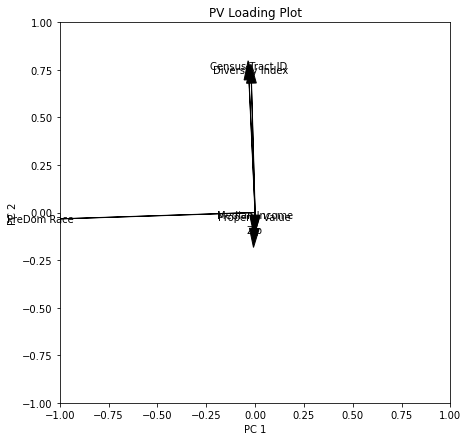

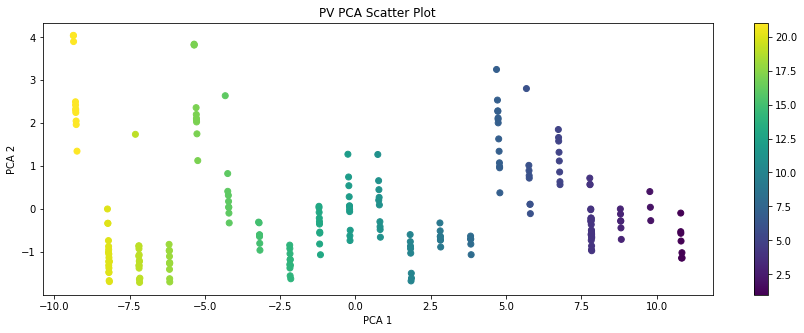

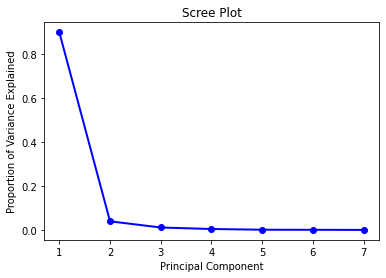

In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=pv_gen_stats.shape[1])
pca1 = PCA(n_components=2)

gen_encoded = pd.get_dummies(pv_gen_stats, columns=['PreDom Race', 'Zip', 'Census Tract ID'])
pca.fit(gen_encoded)
loadings = pca.components_

# Loading Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('PV Loading Plot')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
for i, feature in enumerate(['Census Tract ID',	'Median Income',	'Diversity Index',	'PreDom Race',	'Zip',	'Property Value']):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(loadings[0, i]*1.1, loadings[1, i]*1.1, feature, ha='center', va='center')
plt.show()


# Scatter Plot
_pca = pca1.fit_transform(gen_encoded)
z_arr = np.random.randint(1,22,size=(210, 1))

fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(_pca[:, 0], _pca[:, 1], c=pv_gen_stats['P_Color'])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('PV PCA Scatter Plot')
plt.colorbar()
plt.show()


# Scree plot
variance_ratios = pca.explained_variance_ratio_

fig5, ax5 = plt.subplots()
ax5.plot(range(1, len(variance_ratios) + 1), variance_ratios, 'bo-', linewidth=2)
ax5.set_title('Scree Plot')
ax5.set_xlabel('Principal Component')
ax5.set_ylabel('Proportion of Variance Explained')
plt.show()

## PCA for `gen_facts`

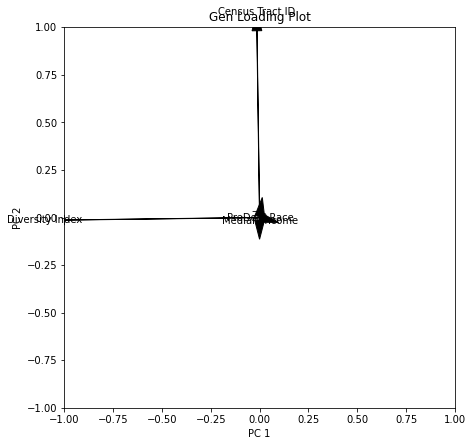

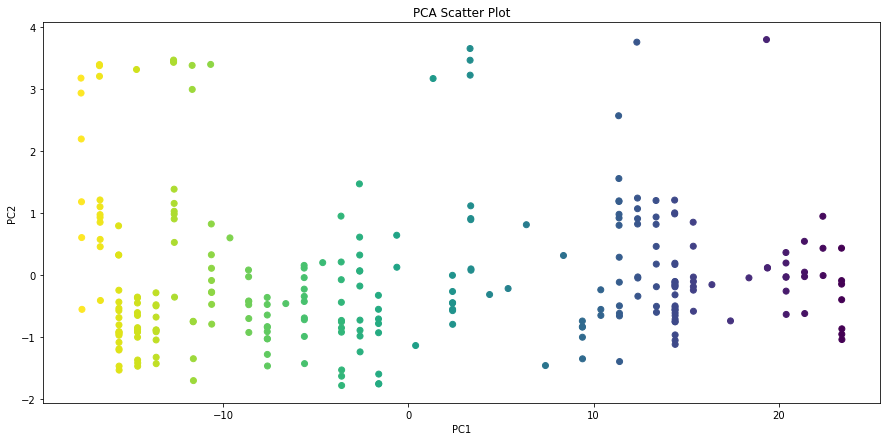

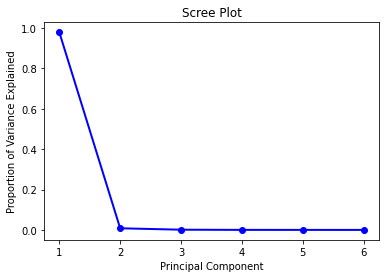

In [146]:
pca = PCA(n_components=gen_facts_zip.shape[1])
pca2 = PCA(n_components=2)

features = ['Census Tract ID',	'Median Income',	'Diversity Index',	'PreDom Race',	'Zip']
gen_encoded = pd.get_dummies(gen_facts_zip, columns=[features[0], features[3], features[4]])

_pca = pca2.fit_transform(gen_encoded)
pca.fit(gen_encoded)
loadings = pca.components_

# Loading Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Gen Loading Plot')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(loadings[0, i]*1.1, loadings[1, i]*1.1, feature, ha='center', va='center')
plt.show()


# Scatter Plot
fig2, ax2 = plt.subplots(figsize=(15, 7))
plt.scatter(_pca[:, 0], _pca[:, 1], c=gen_facts_zip['Z-Color'])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Scatter Plot')
plt.show()

# Scree plot
variance_ratios = pca.explained_variance_ratio_

fig4, ax4 = plt.subplots()
ax4.plot(range(1, len(variance_ratios) + 1), variance_ratios, 'bo-', linewidth=2)
ax4.set_title('Scree Plot')
ax4.set_xlabel('Principal Component')
ax4.set_ylabel('Proportion of Variance Explained')
plt.show()